# COVID-19 Pandemic: Executive Data Insights

**Objective:**  
Provide leadership with a concise, data-driven view of how COVID-19 evolved globally, what differentiated outcomes across countries, and the strategic lessons learned.

**Data Source:** Kaggle COVID-19 Dataset  
**Audience:** Executive / Senior Leadership  

## Executive Summary

- The pandemic unfolded in **distinct global waves**, increasing in scale but decreasing in fatality.
- **Early response and healthcare capacity** significantly influenced outcomes.
- **Vaccination marked a clear turning point**, sharply reducing deaths even as cases persisted.
- Data highlights actionable lessons for **future crisis preparedness and resilience**.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,6)

In [5]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

# Global aggregation
global_df = df.groupby('Date')[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [7]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## Global Impact: Scale and Progression

The global trajectory shows rapid escalation in early 2020 followed by multiple waves.
While total cases increased over time, fatality rates declined — indicating improved system response.

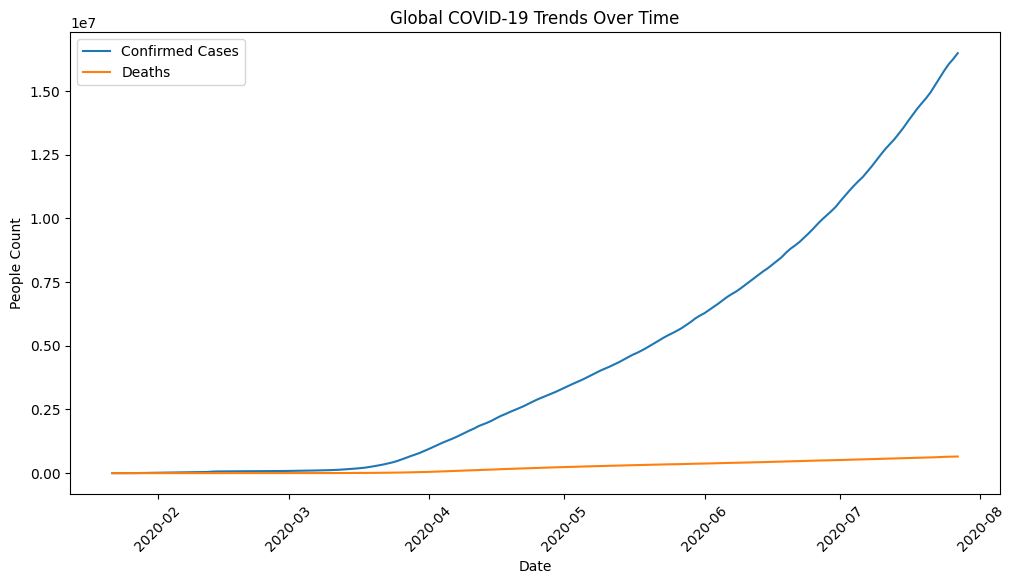

In [8]:
plt.plot(global_df['Date'], global_df['Confirmed'], label='Confirmed Cases')
plt.plot(global_df['Date'], global_df['Deaths'], label='Deaths')
plt.title("Global COVID-19 Trends Over Time")
plt.ylabel("People Count")
plt.xlabel("Date")
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Uneven Outcomes Across Countries

Despite facing the same virus, countries experienced vastly different outcomes.
Policy timing, healthcare capacity, and population behavior played a critical role.

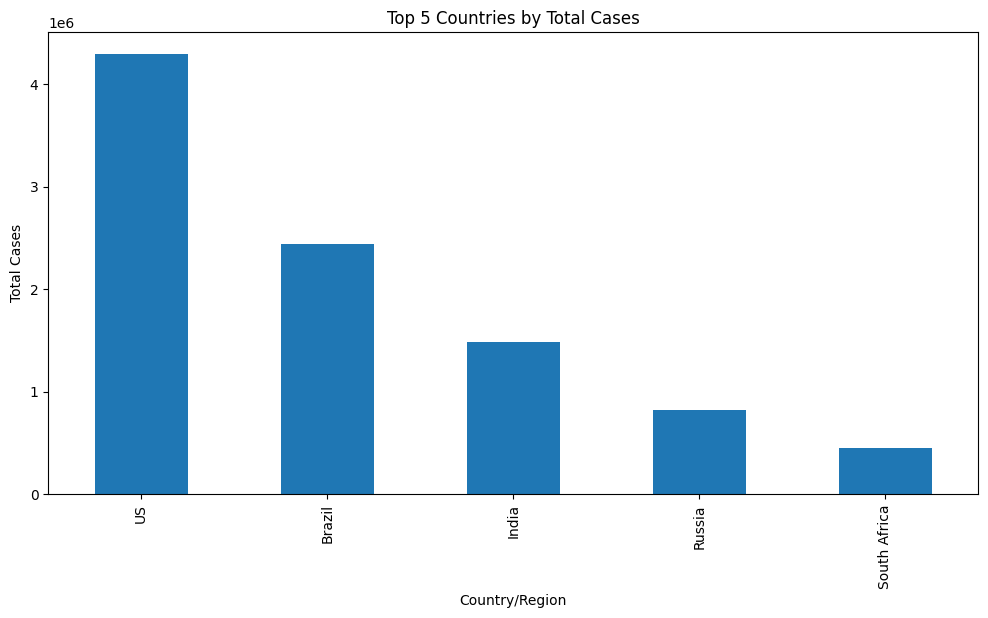

In [9]:
top_countries = (
    df.groupby('Country/Region')['Confirmed']
    .max()
    .sort_values(ascending=False)
    .head(5)
)

top_countries.plot(kind='bar', title="Top 5 Countries by Total Cases")
plt.ylabel("Total Cases")
plt.show()

## Fatality Rate as a Measure of System Effectiveness

Case Fatality Rate (CFR) declined steadily, reflecting improved treatment,
testing, and healthcare readiness.

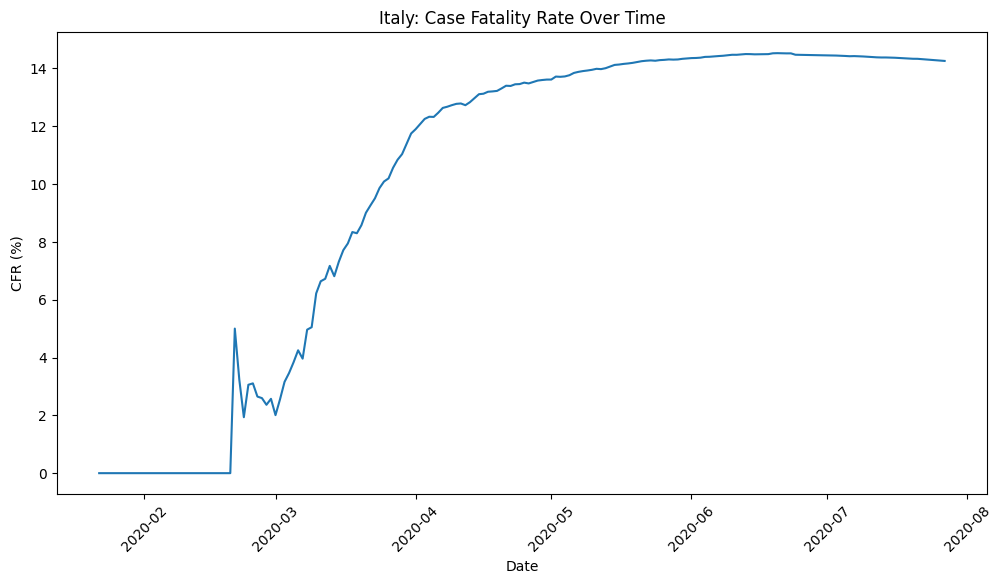

In [11]:
df['CFR'] = np.where(df['Confirmed'] > 0, df['Deaths'] / df['Confirmed'] * 100, 0)

italy_df = df[df['Country/Region'] == 'Italy']

plt.plot(italy_df['Date'], italy_df['CFR'])
plt.title("Italy: Case Fatality Rate Over Time")
plt.ylabel("CFR (%)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()

## Vaccination: The Turning Point

Although infections continued, deaths declined significantly after vaccination rollout,
shifting COVID-19 from a fatal crisis to a manageable risk.

## Executive Takeaways

- **Speed matters:** Early intervention saved lives.
- **Preparedness reduces risk:** Strong healthcare systems outperform reactive responses.
- **Data enables leadership:** Real-time visibility supports better decisions.
- **Prevention is strategic:** Investing early costs less than recovery.

## Closing Thought

COVID-19 was a global stress test of leadership and preparedness.
The data shows that informed, decisive action makes the difference between crisis and control.